In [22]:
from xy_map import XYMap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

## Matrix import

In [2]:
mat = np.loadtxt('eco_matrix.dat')
# Removing the rows and the columns of only zeros
mat = mat[mat.sum(axis=1)>0]
mat = mat[:,mat.sum(axis=0)>0]
pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,...,446,447,448,449,450,451,452,453,454,455
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
1041,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Running the algorithm

### Definition and parameter setting

In [3]:
# Algorithm initialization and default parameter setting
alg = XYMap(mat)

# Current parameters. See documentation for more info
print(alg.params)

{'delta_conv': 1e-08, 't_max': 1000, 'low_bound': 1e-100, 'print_info': True}


In [4]:
# Parameters can be changed by specifying them in the algorithm contructor..
alg = XYMap(mat, delta_conv=10**(-5))

# ..or modifying directly the dictionary
alg.params['t_max'] = 500

print(alg.params)

{'delta_conv': 1e-05, 't_max': 500, 'low_bound': 1e-100, 'print_info': True}


### Execution

In [5]:
# Exponent of the map
gamma = -1 # This case recover the fitness-complexity map

alg.run(gamma)

Convergence in 91 time steps.


## Getting the result

### Plotting the trajectories

Text(0.5, 1.0, 'Score trajectories')

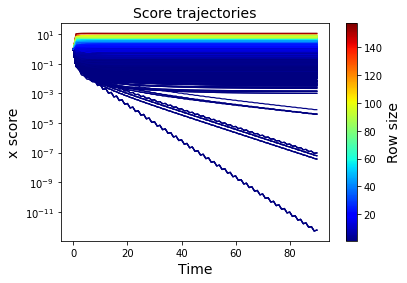

In [9]:
# The function of the algorithm class plots the trajectories colored accodring to the node degree
ax = alg.plot_traj(0)

# Additional features of the plot can be added acting on the returned ax
ax.set_title('Score trajectories', fontsize=14)

### Printing the ranking and the final scores

In [16]:
# Ranking of the matrix idexes. 0 for the x score, 1 for the y score
print(alg.get_ranking(0))
print()

# The algorithm object contains all the x trajectory of the last run.
# The trajectories are stored in a matrix where each column is the score of a given node 
# (indexes that correspond to the original matrix indexes) and each row is the set of scores
# at a given time.
print(alg.x_traj[-1]) # The last row is the list of the final scores and correspond to alg.x_scores
print()
print(alg.x_traj[ :, alg.get_ranking(0)[0] ]) # Trajectory of the largest x_score
print()

[ 66 712 298 ... 856 674 932]

[6.91949209e-01 3.99481095e-03 4.99045444e-03 ... 5.37708708e+00
 3.39916268e+00 2.12923238e+00]

[ 1.         10.74454277 11.33232169 11.60017628 11.71193973 11.70012423
 11.72790955 11.68955633 11.69478269 11.66107437 11.65987479 11.63519796
 11.6325212  11.61554604 11.61292178 11.60150604 11.59933835 11.59170335
 11.59002753 11.58490572 11.58364925 11.58018657 11.5792585  11.5768919
 11.57621114 11.57457212 11.57407393 11.57292132 11.57255654 11.571732
 11.5714642  11.57086325 11.57066582 11.57021903 11.57007267 11.56973359
 11.56962435 11.56936163 11.56927945 11.56907172 11.56900934 11.56884187
 11.56879405 11.5686566  11.56861953 11.56850485 11.56847579 11.56837871
 11.56835564 11.5682724  11.56825385 11.56818167 11.56816657 11.56810337
 11.56809092 11.56803512 11.56802473 11.56797512 11.56796633 11.56792194
 11.56791444 11.56787451 11.56786803 11.56783195 11.56782631 11.56779358
 11.56778861 11.56775881 11.56775442 11.56772721 11.56772329 11.5676983

### Ordering the matrix 

In [26]:
# Running the algorithm close to the phase transition
# It will probably take a couple of minutes to converge
alg.run(-1.2)
rank_x = alg.get_ranking(0)
rank_y = alg.get_ranking(1)

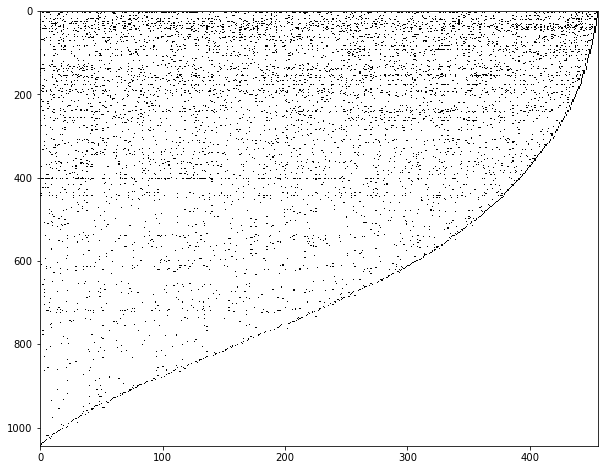

In [32]:
sort_mat = mat[rank_x][:,rank_y[::-1]]
fig = plt.figure(figsize=(10, 8))
plt.imshow(sort_mat, aspect='auto', interpolation='nearest', cmap='Greys')

## Extinction area

In [18]:
# The extinction area can be get through the following method. 
# It refers to the last computed ranking of the given axis.
print(alg.ext_area(0, -1))

Convergence in 91 time steps.
0.29122554950594876


In [23]:
# Scanning the extinction area
gammas = np.linspace(-2,0,50)
areas = np.array([])
alg.params['print_info'] = False

for g in gammas:
    areas = np.append(areas, alg.ext_area(0, g))
    sys.stdout.write('\rLast evaluated gamma: {}'.format(g))
    sys.stdout.flush()

Last evaluated gamma: 0.004081632653061229

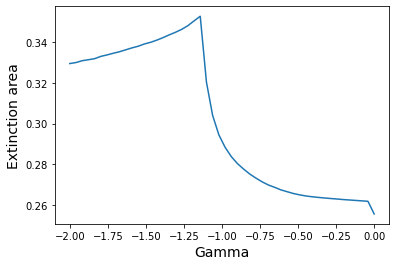

In [24]:
plt.xlabel('Gamma', fontsize=14)
plt.ylabel('Extinction area', fontsize=14)
plt.plot(gammas, areas)

In [25]:
# The following function seach for the maximum by following a simple grid search
# It will take a few minutes since the matrix is quite big
alg.find_best_ext_area()

(-1.1252525252525252, 0.35368773946360155)

## Nestedness

In [36]:
# The nested temperature can be returned through the following method. 
# It refers to the last computed ranking of the given axis.
T, sorted_mat = alg.nest_temp(-1)
print(T)

7.8495429648468695


In [37]:
# Scanning the extinction area
gammas = np.linspace(-2,0,50)
Ts = np.array([])
alg.params['print_info'] = False

for g in gammas:
    Ts = np.append(Ts, alg.nest_temp(g)[0])
    sys.stdout.write('\rLast evaluated gamma: {}'.format(g))
    sys.stdout.flush()

Last evaluated gamma: 0.004081632653061229

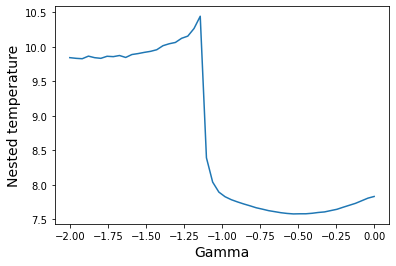

In [38]:
plt.xlabel('Gamma', fontsize=14)
plt.ylabel('Nested temperature', fontsize=14)
plt.plot(gammas, Ts)

In [39]:
# The following function seach for the minimum by following a simple grid search
# It will take a few minutes since the matrix is quite big
alg.find_best_nest_temp()

(-0.5335570469798658, 7.575141832117635)